In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from libra_toolbox.tritium.model import (
    quantity_to_activity,
    activity_to_quantity,
)
from libra_toolbox.tritium.plotting import (
    ureg,
    plot_bars,
    plot_integrated_top_release,
    plot_integrated_wall_release,
    plot_irradiation,
    plot_sample_activity_top,
    plot_sample_activity_wall,
    plot_salt_inventory,
    plot_top_release,
    plot_wall_release,
)

ureg.mpl_formatter = "{:~P}"
# remove top and right axes by default
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# set axis below true by default
plt.rcParams["axes.axisbelow"] = True

from tritium_model import *

Processed data stored in ../../data/processed_data.json


/home/remidm/BABY-1L-run-12/analysis/tritium/tritium_model.py:93: UserWarning: Activity of 1L-IV_12-1-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/home/remidm/BABY-1L-run-12/analysis/tritium/tritium_model.py:93: UserWarning: Activity of 1L-IV_12-2-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/home/remidm/BABY-1L-run-12/analysis/tritium/tritium_model.py:93: UserWarning: Activity of 1L-IV_12-3-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/home/remidm/BABY-1L-run-12/analysis/tritium/tritium_model.py:93: UserWarning: Activity of 1L-IV_12-5-1 is negative after substracting background. Setting to zero.
  warnings.warn(
/home/remidm/BABY-1L-run-12/analysis/tritium/tritium_model.py:93: UserWarning: Activity of 1L-OV_12-3-2 is negative after substracting background. Setting to zero.
  warnings.warn(
/home/remidm/BABY-1L-run-12/analysis/tritium/tritium_model.py:93: UserWarning: Activity of 1L-O

Quantity of T consumed: 1.97×10¹³ particle
Uncertainty on T consumed: 5.29×10¹⁰ particle
Quantity of T consumed: 3.51×10⁴ Bq
Quantity of T produced IV: 6.84×10¹ Bq
Quantity of T produced: 3.82×10¹⁰ particle
Measured TBR: 2.28e-03 particle / neutron
1.3891341451591235 dimensionless


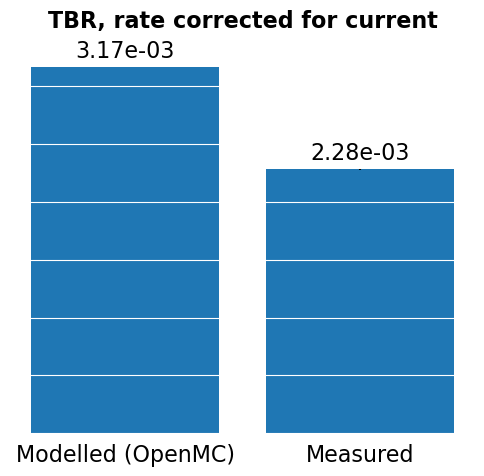

In [2]:
print(f"Quantity of T consumed: {T_consumed.to(ureg.particle):.2e~P}")
print(
    f"Uncertainty on T consumed: {(neutron_rate_relative_uncertainty * T_consumed).to(ureg.particle):.2e~P}"
)
print(f"Quantity of T consumed: {quantity_to_activity(T_consumed).to(ureg.Bq):.2e~P}")
print(f"Quantity of T produced IV: {T_produced_IV:.2e~P}")
print(
    f"Quantity of T produced: {activity_to_quantity(T_produced_IV).to(ureg.particle):.2e~P}"
)
print(f"Measured TBR: {measured_TBR:.2e}")
plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1],
    [calculated_TBR, measured_TBR],
    tick_label=["Modelled (OpenMC)", "Measured"],
    yerr=[0, neutron_rate_relative_uncertainty * measured_TBR],
)

plt.bar_label(bars, fontsize=16, fmt="%.2e", padding=3)
plt.title("TBR, rate corrected for current", weight="bold", fontsize=16, pad=15)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
# plt.tight_layout()
print((calculated_TBR / measured_TBR).to(ureg.dimensionless))
plt.savefig("tbr_comparison.pdf", bbox_inches="tight")
plt.show()

In [3]:
print('Total irradiation time')
print(total_irradiation_time.to(ureg.hour))
print(quantity_to_activity(total_irradiation_time * measured_TBR * neutron_rate).to(ureg.Bq).magnitude)
print(IV_stream.get_cumulative_activity("total")[-1] + OV_stream.get_cumulative_activity("total")[-1])

Total irradiation time
3.0 hour
80.13060343206095
80.13060343206095 becquerel


In [4]:
baby_model.run(7 * ureg.day)

/home/remidm/miniconda3/envs/baby-1l-run-3/lib/python3.13/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [5]:
print(f"Transport:")
print(f"  mass transport coeff IV: {baby_model.k_top:.2e~P}")
print(f"  mass transport coeff OV: {baby_model.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model.TBR:.2e~P}")
print(f"  neutron rate: {baby_model.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model.neutron_rate * baby_model.TBR:.2e~P}")
# print(f"  k_top/k_wall: {baby_model.k_top/baby_model.k_wall:.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff IV: 3.87×10⁻⁶ m/s
  mass transport coeff OV: 2.46×10⁻⁷ m/s
Source:
  TBR: 2.28×10⁻³ particle/n
  neutron rate: 1.82×10⁹ n/s
  neutron rate * TBR: 4.15×10⁶ particle/s
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


/home/remidm/miniconda3/envs/baby-1l-run-3/lib/python3.13/site-packages/labellines/core.py:267: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=np.float64(0.0), xmax=np.float64(7.0), xval=45). Clipping it into the allowed range.
  warnings.warn(
/home/remidm/miniconda3/envs/baby-1l-run-3/lib/python3.13/site-packages/labellines/core.py:267: UserWarning: The value at position 1 in `xvals` is outside the range of its associated line (xmin=np.float64(0.0), xmax=np.float64(7.0), xval=45). Clipping it into the allowed range.
  warnings.warn(


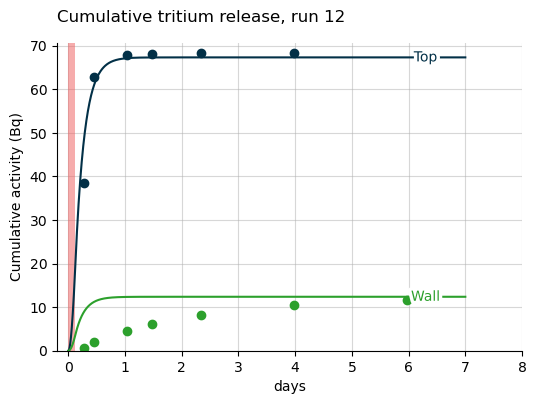

In [6]:
plt.figure(figsize=(6, 4))
(l,) = plot_integrated_top_release(baby_model, color="#023047", label="Top")
plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_top, IV_stream.get_cumulative_activity("total"), color="#023047"
)
plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

# add line where top is 99% of final
#ydata = l.get_ydata()
#xdata = l.get_xdata()
#target_release_frac = 0.99
#x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]


plt.title("Cumulative tritium release, run 12", loc="left", pad=15)
# plt.ylim(top=75)

plt.xlim(left=-0.2, right=8)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

In [7]:
from pathsim_model import my_simulation, cumulative_release_34

my_simulation.run(8 * 24 * 3600)

2025-08-19 12:36:31,730 - INFO - LOGGING (log: True)
2025-08-19 12:36:31,731 - INFO - GRAPH (size: 21, alg. depth: 4, loop depth: 0, runtime: 0.092ms)
2025-08-19 12:36:31,731 - INFO - STARTING -> TRANSIENT (Duration: 691200.00s)
2025-08-19 12:36:31,732 - INFO - TRANSIENT:   0% | elapsed: 00:00:00 (eta: --:--:--) | 0 steps (N/A steps/s)
2025-08-19 12:36:32,562 - INFO - TRANSIENT:  20% | elapsed: 00:00:00 (eta: 00:00:03) | 1383 steps (1665.4 steps/s)
2025-08-19 12:36:33,223 - INFO - TRANSIENT:  40% | elapsed: 00:00:01 (eta: 00:00:02) | 2765 steps (2092.0 steps/s)
2025-08-19 12:36:34,223 - INFO - TRANSIENT:  56% | elapsed: 00:00:02 (eta: 00:00:01) | 3871 steps (1105.8 steps/s)
2025-08-19 12:36:34,457 - INFO - TRANSIENT:  60% | elapsed: 00:00:02 (eta: 00:00:01) | 4148 steps (1182.7 steps/s)
2025-08-19 12:36:35,459 - INFO - TRANSIENT:  80% | elapsed: 00:00:03 (eta: 00:00:00) | 5512 steps (1361.6 steps/s)
2025-08-19 12:36:35,498 - INFO - TRANSIENT:  80% | elapsed: 00:00:03 (eta: 00:00:00) | 

{'total_steps': 6912,
 'successful_steps': 6912,
 'runtime_ms': 4786.392942012753}

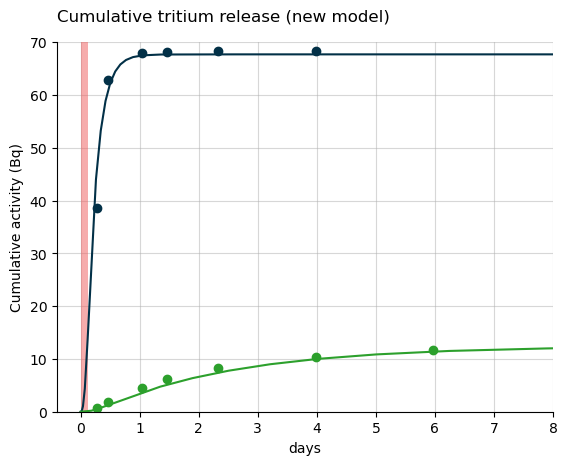

In [20]:
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.scatter(
    replacement_times_top, IV_stream.get_cumulative_activity("total"), color="#023047"
)
plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

time, data = cumulative_release_34.read()
plt.plot((time * ureg.s), quantity_to_activity(data[0] * ureg.particle), color="#023047")
plt.plot((time * ureg.s), quantity_to_activity(data[1] * ureg.particle), color="tab:green",)

plt.title("Cumulative tritium release (new model)", loc="left", pad = 15)
plt.ylim(0, 70)
plt.xlim(right = 8)
plt.xlabel("days")

plt.ylabel("Cumulative activity (Bq)")

plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)

plt.show()

In [9]:
from pathsim_model import OV_gas_residence_time, IV_gas_residence_time, baby_residence_time

print(f"{(OV_gas_residence_time * ureg.s).to(ureg.day):.2f~P}")
print(f"{(IV_gas_residence_time * ureg.s).to(ureg.min):.2f~P}")

print(f"Baby residence time: {(baby_residence_time * ureg.s).to(ureg.day):.2f~P}")

print(f"Total IV stream residence time: {((IV_gas_residence_time + baby_residence_time)  * ureg.s).to(ureg.hour):.2f~P}")
print(f"Total OV stream residence time: {((OV_gas_residence_time + baby_residence_time) * ureg.s).to(ureg.hour):.2f~P}")

2.32 d
27.97 min
Baby residence time: 0.16 d
Total IV stream residence time: 4.40 h
Total OV stream residence time: 59.69 h


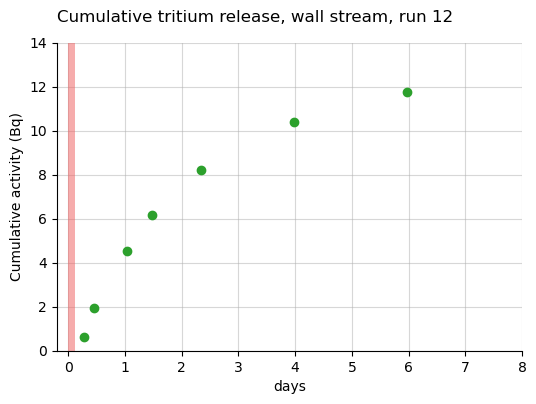

In [10]:
plt.figure(figsize=(6, 4))
# plot_integrated_wall_release(baby_model, color="tab:green", label="Wall")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[45] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)


plt.title("Cumulative tritium release, wall stream, run 12", loc="left", pad = 15)
plt.ylim(top=14)
plt.xlim(right = 8)
plt.xlim(left = -0.2)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

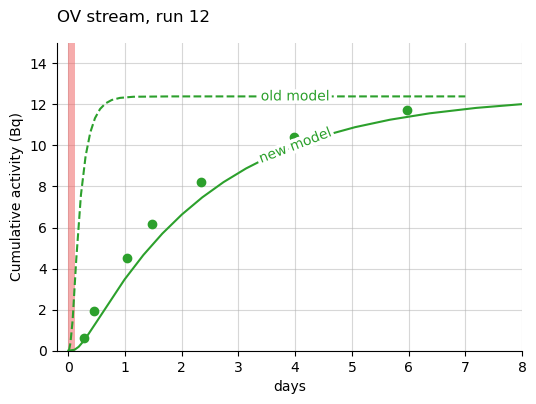

In [27]:
plt.figure(figsize=(6, 4))
(l,) = plot_integrated_wall_release(baby_model, color="tab:green", label="old model", linestyle="dashed")
plt.plot((time * ureg.s), quantity_to_activity(data[1] * ureg.particle), color="tab:green", label="new model")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5, xvals=[4] * 2)
plt.ylim(bottom=0 * ureg.Bq)

plt.scatter(
    replacement_times_walls,
    OV_stream.get_cumulative_activity("total"),
    color="tab:green",
)

# add line where top is 99% of final
ydata = l.get_ydata()
xdata = l.get_xdata()
target_release_frac = 0.90
x_target = xdata[np.argmax(ydata > target_release_frac * ydata[-1])]



plt.title("OV stream, run 12", loc="left", pad = 15)
plt.ylim(top=15)
plt.xlim(right = 8)
plt.xlim(left = -0.2)
plt.xlabel("days")
plt.ylabel("Cumulative activity (Bq)")

plt.savefig("cumulative_release.pdf", bbox_inches="tight")

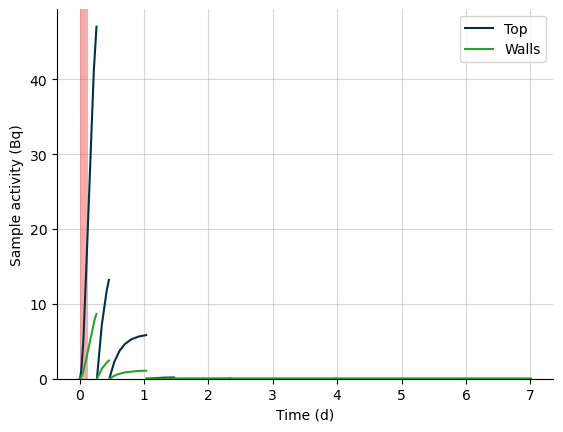

In [12]:
plot_sample_activity_top(
    baby_model, replacement_times=replacement_times_top, color="#023047", label="Top"
)
plot_sample_activity_wall(
    baby_model,
    replacement_times=replacement_times_walls,
    color="tab:green",
    label="Walls",
)
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)

plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
plt.legend()
plt.grid(alpha=0.5)

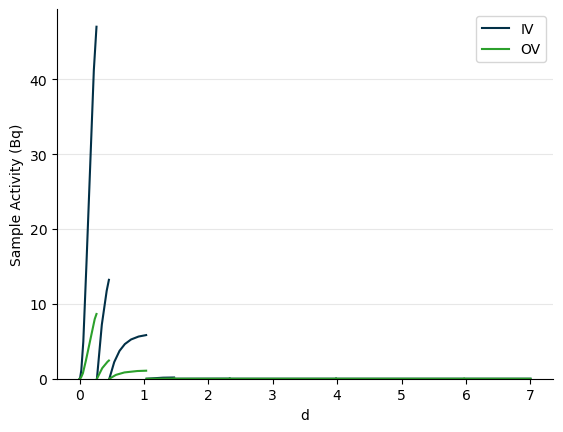

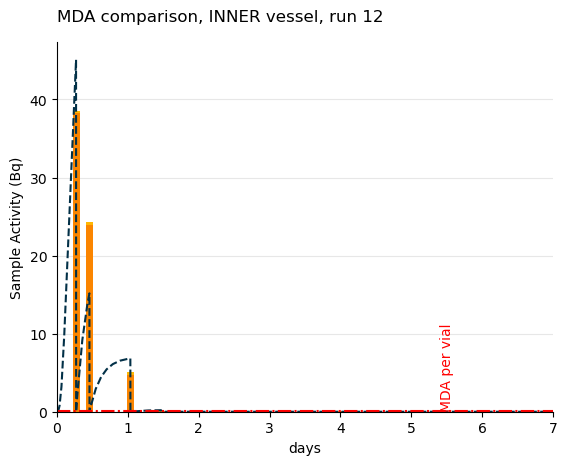

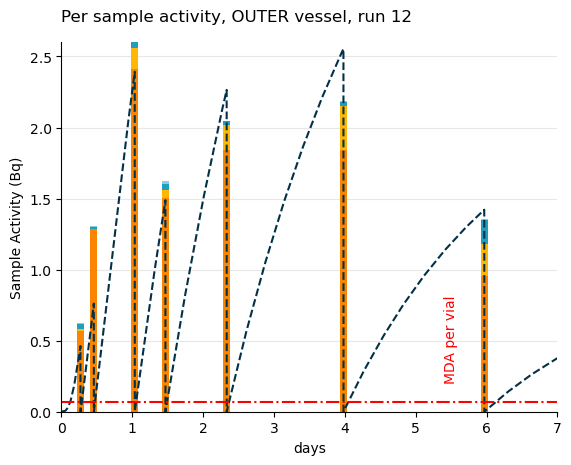

In [13]:
from pathsim_model import iv_vial_activity_21, ov_vial_activity_28

plt.figure()
plot_sample_activity_top(
    baby_model, replacement_times=replacement_times_top, color="#023047", label="IV"
)
plot_sample_activity_wall(
    baby_model, replacement_times=replacement_times_walls, color="tab:green", label="OV"
)
plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.ylabel("Sample Activity (Bq)")
plt.legend()

plt.figure()
plot_bars(IV_stream, index=[time.to(ureg.day) for time in replacement_times_top], bar_width = 0.1)
#plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Model")
time, data = iv_vial_activity_21.read()
# for i, d in enumerate(data):
#     plt.plot(
#         (time * ureg.s).to(ureg.day), quantity_to_activity(d*ureg.particle), label=f"IV vial {i+1}", color="#023047", linestyle="--"
#     )
plt.plot(
    (time * ureg.s).to(ureg.day), quantity_to_activity(np.sum(data, axis=0)*ureg.particle), color="#023047", linestyle="--"
)
MDA = 0.071  # Calculated by hand for demo, TODO create code to calculate automatically

plt.axhline(y=MDA, color = "red", linestyle = "-.")
plt.annotate(
    f"MDA per vial",
    (5.5, 0.1),
    xytext=(0, 0),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="red",
    rotation=90,
)

plt.grid(True, axis="y", alpha=0.3)
plt.ylim(bottom=0 * ureg.Bq)
plt.xlim(0, 7)
plt.ylabel("Sample Activity (Bq)")
plt.xlabel("days")
plt.title("MDA comparison, INNER vessel, run 12", loc="left", pad=15)


plt.figure()
plot_bars(OV_stream, index=[time.to(ureg.day) for time in replacement_times_walls], bar_width = 0.1)
# plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Model")
time, data = ov_vial_activity_28.read()
# for i, d in enumerate(data):
#     plt.plot(
#         (time * ureg.s).to(ureg.day), quantity_to_activity(d*ureg.particle), label=f"IV vial {i+1}", color="#023047", linestyle="--"
#     )
plt.plot(
    (time * ureg.s).to(ureg.day), quantity_to_activity(np.sum(data, axis=0)*ureg.particle), color="#023047", linestyle="--"
)
plt.grid(True, axis="y", alpha=0.3)
# plt.ylim(bottom=0 * ureg.Bq)
plt.xlim(0, 7)
plt.ylabel("Sample Activity (Bq)")
plt.xlabel("days")
plt.title("Per sample activity, OUTER vessel, run 12", loc="left", pad=15)

MDA = 0.071  # Calculated by hand for demo, 100 min counts, TODO create code to calculate automatically
#For 500 min counts MDA = 0.029

plt.axhline(y=MDA, color = "red", linestyle = "-.")
plt.annotate(
    f"MDA per vial",
    (5.5, 0.2),
    xytext=(0, 0),
    textcoords="offset points",
    ha="center",
    va="bottom",
    color="red",
    rotation=90,
)

plt.show()

## How did $k_\mathrm{top}$ improve compared to run 1

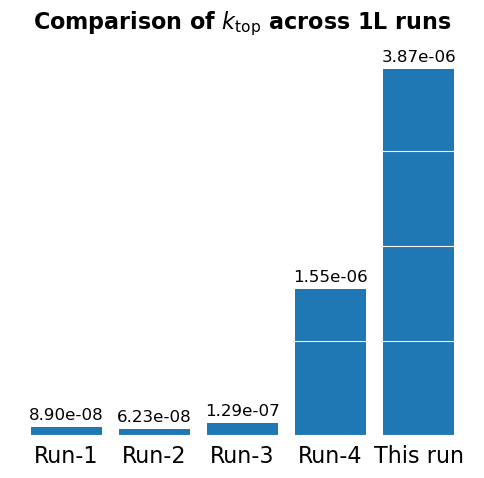

In [14]:
import requests

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-1/refs/tags/v0.5/data/processed_data.json"
response = requests.get(url)
data_run_1 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-2/refs/tags/v0.3/data/processed_data.json"
response = requests.get(url)
data_run_2 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-3/refs/heads/main/data/processed_data.json"
response = requests.get(url)
data_run_3 = response.json()

url = "https://raw.githubusercontent.com/LIBRA-project/BABY-1L-run-4/refs/heads/main/data/processed_data.json"
response = requests.get(url)
data_run_4 = response.json()

plt.figure(figsize=(6, 5))
bars = plt.bar(
    [0, 1, 2, 3, 4],
    [
        data_run_1["k_top"]["value"],
        data_run_2["k_top"]["value"],
        data_run_3["k_top"]["value"],
        data_run_4["k_top"]["value"],
        k_top.magnitude,
    ],
    tick_label=["Run-1", "Run-2", "Run-3", "Run-4", "This run"],
)

plt.bar_label(bars, fontsize=12, fmt="%.2e", padding=3)
plt.title(
    r"Comparison of $k_\mathrm{top}$ across 1L runs", weight="bold", fontsize=16, pad=15
)
plt.ylabel("")
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels
plt.gca().tick_params(axis="both", which="both", left=False, bottom=False, labelsize=16)
plt.gca().set_axisbelow(False)
plt.grid(axis="y", alpha=1, color="white", zorder=-10)
plt.show()

In [15]:
def model_from_json(json_data: dict) -> Model:
    """
    Create a model from JSON data.
    """
    # Extract the relevant data from the JSON
    k_top = json_data["k_top"]["value"] * ureg(json_data["k_top"]["unit"])
    k_wall = json_data["k_wall"]["value"] * ureg(json_data["k_wall"]["unit"])
    neutron_rate = json_data["neutron_rate_used_in_model"]["value"] * ureg(
        json_data["neutron_rate_used_in_model"]["unit"]
    )
    irradiations = [
        (
            irr["start_time"]["value"] * ureg(irr["start_time"]["unit"]),
            irr["stop_time"]["value"] * ureg(irr["stop_time"]["unit"]),
        )
        for irr in json_data["irradiations"]
    ]

    # Create a new model instance with the extracted parameters
    model = Model(
        radius=json_data["modelled_baby_radius"]["value"]
        * ureg(json_data["modelled_baby_radius"]["unit"]),
        height=json_data["modelled_baby_height"]["value"]
        * ureg(json_data["modelled_baby_height"]["unit"]),
        TBR=json_data["TBR_used_in_model"]["value"]
        * ureg(json_data["TBR_used_in_model"]["unit"]),
        k_top=k_top,
        k_wall=k_wall,
        neutron_rate=neutron_rate,
        irradiations=irradiations,
    )

    return model

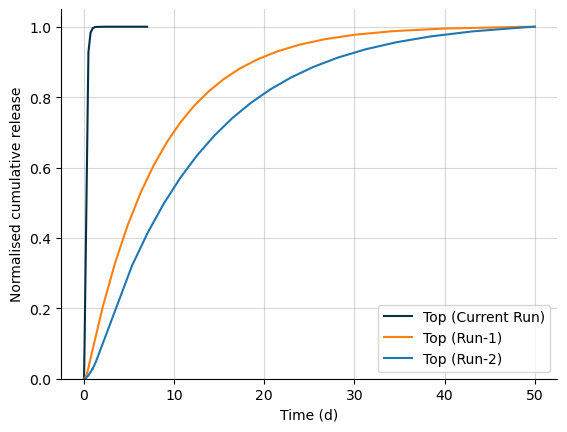

In [16]:
from libra_toolbox.tritium.plotting import COLLECTION_VOLUME, LSC_SAMPLE_VOLUME


def plot_normalised_integrated_top(model, **kwargs):
    integrated_top = quantity_to_activity(model.integrated_release_top()).to(ureg.Bq)
    sample_activity_top = integrated_top / COLLECTION_VOLUME * LSC_SAMPLE_VOLUME

    normalised_top = sample_activity_top / sample_activity_top[-1]

    l = plt.plot(model.times.to(ureg.day), normalised_top, **kwargs)
    return l


plt.figure()

# current run
l = plot_normalised_integrated_top(
    baby_model, color="#023047", label="Top (Current Run)"
)

# run 1
model_run_1 = model_from_json(data_run_1)
model_run_1.run(50 * ureg.day)

l = plot_normalised_integrated_top(model_run_1, color="tab:orange", label="Top (Run-1)")

# run 2
model_run_2 = model_from_json(data_run_2)
model_run_2.run(50 * ureg.day)

l = plot_normalised_integrated_top(model_run_2, color="tab:blue", label="Top (Run-2)")

plt.ylim(bottom=0)
plt.grid(alpha=0.5)
plt.legend()

plt.ylabel("Normalised cumulative release")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")

plt.show()